In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math

% matplotlib inline

In [2]:
class CausalConv1d(nn.Conv1d):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, dilation=1, groups=1, bias=True):
        super(CausalConv1d, self).__init__( in_channels, out_channels, kernel_size, stride=stride, padding=0,
            dilation=dilation, groups=groups, bias=bias)

        self.left_padding = dilation * (kernel_size - 1)
        self.weight = init.xavier_uniform(self.weight, gain=np.sqrt(2))
        self.bias = init.constant(self.bias, 0.1)


    def forward(self, input):

        temp = torch.unsqueeze(input, 0)
        x = F.pad(temp, (self.left_padding, 0, 0, 0))
        x = torch.squeeze(x, 0)

        
        return super(CausalConv1d, self).forward(x)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = CausalConv1d(1, 1, 2, dilation = 512)
        self.conv2 = CausalConv1d(1, 1, 2, dilation = 256)
        self.conv3 = CausalConv1d(1, 1, 2, dilation = 128)
        self.conv4 = CausalConv1d(1, 1, 2, dilation = 64)
        self.conv5 = CausalConv1d(1, 1, 2, dilation = 32)
        self.conv6 = CausalConv1d(1, 1, 2, dilation = 16)
        self.conv7 = CausalConv1d(1, 1, 2, dilation = 8)
        self.conv8 = CausalConv1d(1, 1, 2, dilation = 4)
        self.conv9 = CausalConv1d(1, 1, 2, dilation = 2)
        self.conv10 = CausalConv1d(1, 1, 2, dilation = 1)
        self.Tanh = nn.Tanh()
        self.ReLU = nn.ReLU()
        self.Sigmoid = nn.Sigmoid()
        self.oneone = nn.Conv1d(1, 1, 1)
        self.LogSoftmax = nn.LogSoftmax(1)
    
    def forward(self, x):
        x1 = self.conv10(x)
      
        x2 = self.conv9(x1)
        t2 = self.Tanh(x2)
        s2 = self.Sigmoid(x2)
        element2 = t2 * s2
        oneone2 = self.oneone(element2) 
        resAdd1 = oneone2 + x1
        
        x3 = self.conv8(resAdd1)
        t3 = self.Tanh(x3)
        s3 = self.Sigmoid(x3)
        element3 = t3 * s3
        oneone3 = self.oneone(element3)
        resAdd2 = oneone3 + oneone2
        
        x4 = self.conv7(resAdd2)
        t4 = self.Tanh(x4)
        s4 = self.Sigmoid(x4)
        element4 = t4 * s4
        oneone4 = self.oneone(element4)
        resAdd3 = oneone4 + oneone3
        
        x5 = self.conv6(resAdd3)
        t5 = self.Tanh(x5)
        s5 = self.Sigmoid(x5)
        element5 = t5 * s5
        oneone5 = self.oneone(element5)
        resAdd4 = oneone5 + oneone4
         
        x6 = self.conv5(resAdd4)
        t6 = self.Tanh(x6)
        s6 = self.Sigmoid(x6)
        element6 = t6 * s6
        oneone6 = self.oneone(element6)
        resAdd5 = oneone6 + oneone5
       
        x7 = self.conv4(resAdd5)
        t7 = self.Tanh(x7)
        s7 = self.Sigmoid(x7)
        element7 = t7 * s7
        oneone7 = self.oneone(element7)
        resAdd6 = oneone7 + oneone6
        
        x8 = self.conv3(resAdd6)
        t8 = self.Tanh(x8)
        s8 = self.Sigmoid(x8)
        element8 = t8 * s8
        oneone8 = self.oneone(element8)
        resAdd7 = oneone8 + oneone7
        
        x9 = self.conv2(resAdd7)
        t9 = self.Tanh(x9)
        s9 = self.Sigmoid(x9)
        element9 = t9 * s9
        oneone9 = self.oneone(element9)
        resAdd8 = oneone9 + oneone8
        
        x10 = self.conv1(resAdd8)
        t10 = self.Tanh(x10)
        s10 = self.Sigmoid(x10)
        element10 = t10 * s10
        oneone10 = self.oneone(element10)
        resAdd9 = oneone10 + oneone9
        
        
        x = oneone2 + oneone3 + oneone4 + oneone5 + oneone6 + oneone7 + oneone8 + oneone9 + oneone10

        x = self.ReLU(x)
        x = self.oneone(x)
        x = self.ReLU(x)
        x = self.oneone(x)
        x = self.LogSoftmax(x)

        return x

In [5]:
Network = Net()

if (torch.cuda.is_available()):
    Network.cuda()
    print('CUDA Enabled; Running on GPU')
    
print(Network)

CUDA Enabled; Running on GPU
Net(
  (conv1): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(512,))
  (conv2): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(256,))
  (conv3): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(128,))
  (conv4): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(64,))
  (conv5): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(32,))
  (conv6): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(16,))
  (conv7): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(8,))
  (conv8): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(4,))
  (conv9): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(2,))
  (conv10): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,))
  (Tanh): Tanh()
  (ReLU): ReLU()
  (Sigmoid): Sigmoid()
  (oneone): Conv1d (1, 1, kernel_size=(1,), stride=(1,))
  (LogSoftmax): LogSoftmax()
)


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Network.parameters(), lr=2e-5)

# Generate data

In [15]:
def batch_generator():
    while True:
        start = np.random.randint(-100, 100, size=1)
        xs = np.linspace(start, start+np.pi*10, 4000)
        ys = np.sin(xs) + np.random.rand(4000)*0.2-0.1
        ys = ys.astype(np.float32) # default is np.float64
        x = torch.from_numpy(ys).view(1,1,-1)
        y = torch.from_numpy(ys[0:4000]).view(1,1,-1)
        if (torch.cuda.is_available()):
            x = x.cuda()
            y = y.cuda()
            
        yield Variable(x), Variable(y)

g = batch_generator()

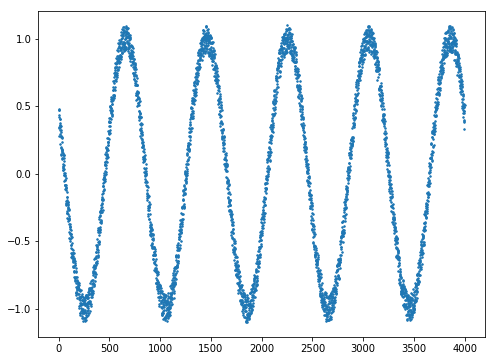

In [16]:
x, _ = next(g)
plt.figure(figsize=[8,6])
plt.plot(x.cpu().data.numpy()[0][0],'.', ms=3)

# Training

In [18]:
max_epoch = 10000

loss_save = []
for epoch in range(max_epoch):
    inputs, target = next(g)
    
    optimizer.zero_grad()
    output = Network(inputs)
    
    loss = ((output-target)**2).mean()
    loss.backward()
    torch.nn.utils.clip_grad_norm(Network.parameters(), 0.002)
    optimizer.step()
    
    loss_save.append(loss.data[0])
    if epoch%1000 == 0:
        print('epoch {}, loss {:8.4g}'.format(epoch, loss.data[0]))

epoch 0, loss   0.5042
epoch 1000, loss   0.5049
epoch 2000, loss   0.5023
epoch 3000, loss   0.5011
epoch 4000, loss   0.5008
epoch 5000, loss   0.5052
epoch 6000, loss   0.5029
epoch 7000, loss   0.5047
epoch 8000, loss   0.5025
epoch 9000, loss   0.5039


(0, 10000)

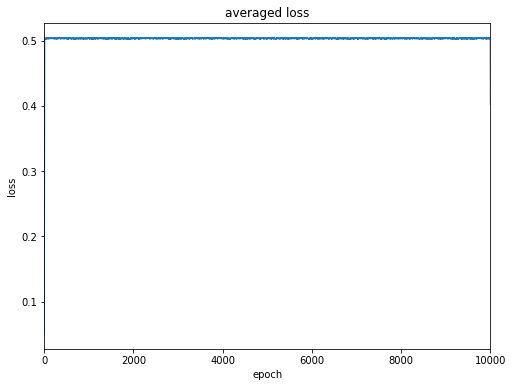

In [19]:
plt.figure(figsize=[8,6])
plt.plot(np.convolve(loss_save, np.ones(10)/10))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('averaged loss')
plt.xlim([0,10000])

# Predict from test batch

In [33]:
x, _ = next(g)
x = x.cpu().data.numpy()
n = 5000

predict_save = []
for _ in range(n):
    inputs = Variable(torch.from_numpy(x))
    
    if (torch.cuda.is_available()):
        inputs = inputs.type(torch.cuda.FloatTensor)
    
    predict = Network(inputs)
    predict_save.append(predict.data[0][0][-1])
    x = np.roll(x, -1, axis=2)
    x[0][0][-1] = predict.data[0][0][-1]

(0, 5000)

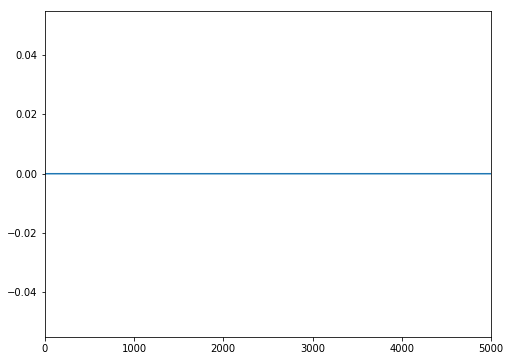

In [34]:
plt.figure(figsize=[8,6])
plt.plot(predict_save)
plt.xlim([0,5000])

# Predict from random input

In [35]:
x = np.random.rand(1,1,1000).astype(np.float32)
n = 5000

predict_save = []
for _ in range(n):
    inputs = Variable(torch.from_numpy(x))
    
    if (torch.cuda.is_available()):
        inputs = inputs.type(torch.cuda.FloatTensor)
    
    predict = Network(inputs)
    predict_save.append(predict.data[0][0][-1])
    x = np.roll(x, -1, axis=2)
    x[0][0][-1] = predict.data[0][0][-1]

(0, 5000)

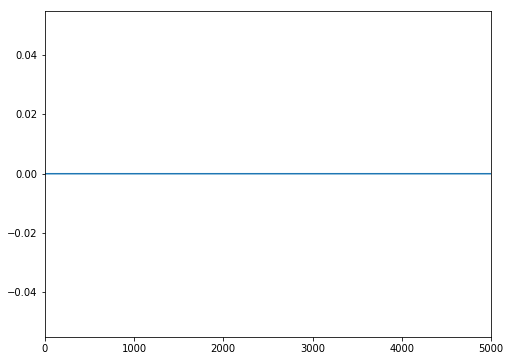

In [36]:
plt.figure(figsize=[8,6])
plt.plot(predict_save)
plt.xlim([0,5000])